In [75]:
from pandas import *
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu
from statsmodels import api as sm
import statsmodels.formula.api as smf
from ggplot import *

sns.set_style('whitegrid')

%matplotlib inline

In [2]:
ls

proj1_analysis.ipynb             turnstile-weather-variables.pdf
proj1_report.pages               turnstile_weather_v2.csv


In [3]:
df = read_csv('turnstile_weather_v2.csv')
df.describe()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
count,4.264900e+04,4.264900e+04,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,...,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000
mean,2.812486e+07,1.986993e+07,1886.589955,1361.487866,10.046754,2.905719,0.714436,40.724647,-73.940364,0.009824,...,29.971096,0.224741,63.103780,6.927872,0.004618,29.971096,63.103780,6.927872,40.728555,-73.938693
std,3.043607e+07,2.028986e+07,2952.385585,2183.845409,6.938928,2.079231,0.451688,0.071650,0.059713,0.098631,...,0.137942,0.417417,8.455597,4.510178,0.016344,0.131158,6.939011,3.179832,0.065420,0.059582
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,40.576152,-74.073622,0.000000,...,29.550000,0.000000,46.900000,0.000000,0.000000,29.590000,49.400000,0.000000,40.600204,-74.014870
25%,1.039762e+07,7.613712e+06,274.000000,237.000000,4.000000,1.000000,0.000000,40.677107,-73.987342,0.000000,...,29.890000,0.000000,57.000000,4.600000,0.000000,29.913333,58.283333,4.816667,40.688591,-73.985130
50%,1.818389e+07,1.331609e+07,905.000000,664.000000,12.000000,3.000000,1.000000,40.717241,-73.953459,0.000000,...,29.960000,0.000000,61.000000,6.900000,0.000000,29.958000,60.950000,6.166667,40.720570,-73.949150
75%,3.263049e+07,2.393771e+07,2255.000000,1537.000000,16.000000,5.000000,1.000000,40.759123,-73.907733,0.000000,...,30.060000,0.000000,69.100000,9.200000,0.000000,30.060000,67.466667,8.850000,40.755226,-73.912033
max,2.357746e+08,1.493782e+08,32814.000000,34828.000000,20.000000,6.000000,1.000000,40.889185,-73.755383,1.000000,...,30.320000,1.000000,86.000000,23.000000,0.157500,30.293333,79.800000,17.083333,40.862064,-73.694176


In [25]:
out_var = 'ENTRIESn_hourly'

In [5]:
df_day = df.groupby(['DATEn', 'weekday'], as_index=0)[out_var].sum()

In [6]:
# analyze the weekday and weekend ENTRIESn_hourly
# question: is the weekend ENTRIESn_hourly
mask = df.rain == 1
df_rainy = df[mask]
df_non_rainy = df[~mask]

In [8]:
stats_a = df_rainy[out_var].describe()
stats_b = df_non_rainy[out_var].describe()

In [9]:
stats_a, stats_b

(count     9585.000000
 mean      1459.373918
 std       2360.445395
 min          0.000000
 25%        243.000000
 50%        696.000000
 75%       1625.000000
 max      33215.000000
 Name: EXITSn_hourly, dtype: float64, count    33064.000000
 mean      1333.111451
 std       2129.111172
 min          0.000000
 25%        235.000000
 50%        656.000000
 75%       1507.000000
 max      34828.000000
 Name: EXITSn_hourly, dtype: float64)

In [120]:
a = df[df.rain == 1][out_var]
b = df[df.rain == 0][out_var]
print mannwhitneyu(a, b)
print ttest_ind(a, b)

(153635120.5, 2.7410695712437496e-06)
(array(5.334839860131678), 9.6115483857666826e-08)


In [11]:
df.columns

Index([u'UNIT', u'DATEn', u'TIMEn', u'ENTRIESn', u'EXITSn', u'ENTRIESn_hourly',
       u'EXITSn_hourly', u'datetime', u'hour', u'day_week', u'weekday',
       u'station', u'latitude', u'longitude', u'conds', u'fog', u'precipi',
       u'pressurei', u'rain', u'tempi', u'wspdi', u'meanprecipi',
       u'meanpressurei', u'meantempi', u'meanwspdi', u'weather_lat',
       u'weather_lon'],
      dtype='object')

In [110]:
features = [
    'EXITSn_hourly', 
    'rain',
    'meantempi'
]
# mod = sm.OLS(df)
# mod = smf.ols('ENTRIESn_hourly ~ EXITSn_hourly + rain', df)
mod = sm.OLS(df[out_var], df.ix[:, features])
res = mod.fit()

print res.summary()

                            OLS Regression Results                            
Dep. Variable:        ENTRIESn_hourly   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                 1.966e+04
Date:                Mon, 25 May 2015   Prob (F-statistic):               0.00
Time:                        17:49:33   Log-Likelihood:            -3.9008e+05
No. Observations:               42649   AIC:                         7.802e+05
Df Residuals:                   42646   BIC:                         7.802e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
EXITSn_hourly     0.8685      0.005    173.016

In [49]:
dim= ['UNIT', 'DATEn']

In [57]:
fig, axes = plt.subplots(211)

df[mask][out_var].hist(bins=200, ax=axes[0])
df[~mask][out_var].hist(bins=200, ax=axes[1])

ax.set_xscale('log')

KeyboardInterrupt: 

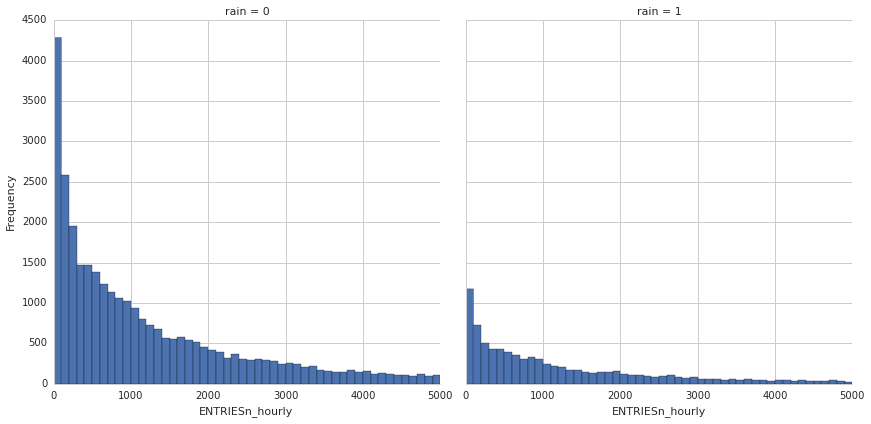

In [118]:
g = sns.FacetGrid(data=df.ix[:, ['rain', out_var]], col='rain', size=6)
g.map(plt.hist, out_var, bins=50, range=(0, 5000), normed=False)
g.set_ylabels('Frequency')
g.savefig('3.1.hist_rainy_ridership.png')

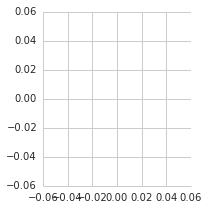

In [82]:
g = sns.FacetGrid(data=df)
g.map(plt.plot, x='TIMEn', y=out_var)

In [89]:
df['weekday'] = to_datetime(df['DATEn']).apply(lambda x: x.weekday())

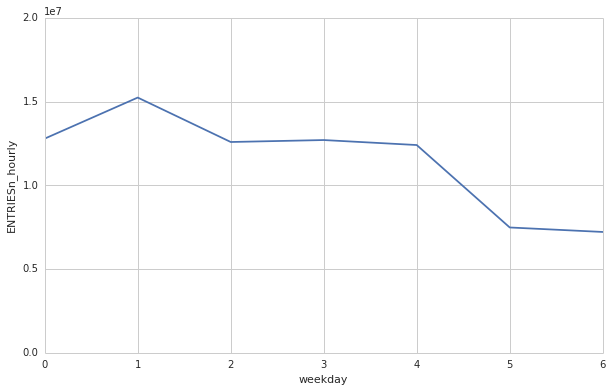

In [100]:
fig, ax = plt.subplots()
ax.set_ylim((0, 2e7))
ax.set_ylabel(out_var)
df.groupby('weekday')[out_var].sum().plot(ax=ax, figsize=(10, 6))
fig.savefig('3.2.ridership_by_weekday.png')

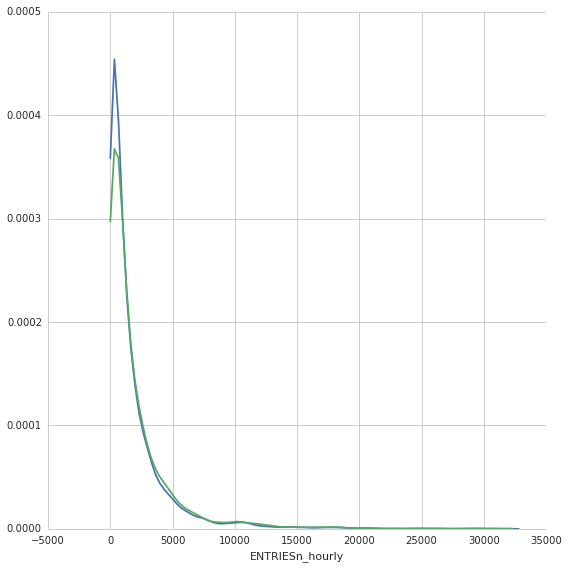

In [103]:
g = sns.FacetGrid(df, hue='rain', size=8)
g.map(sns.kdeplot, out_var)